### Fórmulas de integración de Newton-Cotes

Utilizar regla del trapecio para integrar la siguiente función entre $a = 0$ y $b = 0.8$

$$f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$$

#### Solución

Primero graficaremos la función para tener una idea del problema al que nos enfrentamos.

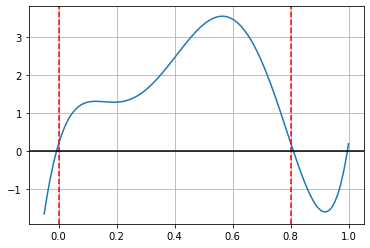

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-0.05, 1.0, num = 200)

a = 0.0
b = 0.8

def function(x_in):
    return (0.2 + 25*x_in - 200*x_in**2 + 675*x_in**3 - 900*x_in**4 + 400*x_in**5)

f_x = function(x)

plt.plot(x, f_x)
plt.axvline(a, color = 'r', linestyle = '--')
plt.axvline(b, color = 'r', linestyle = '--')
plt.axhline(color = 'k')
plt.grid()
plt.show()

Posteriormente, aplicamos el método.

Recordando la fórmula

$$I = (b - a) \frac{f(a) + f(b)}{2}$$

In [2]:
def trapeze_integration(a, b, function):
    return ((b - a)*(function(a) + function(b))/2)

I = trapeze_integration(a, b, function)

print("El área aproximada es: {:.5}".format(I))

El área aproximada es: 0.1728


Ahora vamos a comparar nuestro resultado con lo que se obtiene en Wolfram Alpha.

<img src="files/Integration_1.png">

Observamos un error muy grande

$$\varepsilon_T = 1.64053 - 0.17280 = 1.46773$$

### Aplicación múltiple

Recordando la fórmula para la regla del trapecio con aplicación múltiple

$$I = \frac{h}{2} \left[ f(x_0) + 2\sum\limits_{i = 1}^{n - 1} f(x_i) + f(x_n) \right]$$

Resolveremos el mismo problema pero ahora dividiendo el intervalo de $a$ a $b$ con $n = 10$

In [3]:
def multiple_aplication_trapeze(a, b, function, n):
    x = np.linspace(a, b, n + 1)
    h = (b - a)/n
    sumatory = 0
    for i in range(1, n):
        sumatory = sumatory + function(x[i])
    return (h/2*(function(x[0]) + 2*sumatory + function(x[-1])))
            
I_multiple_trapeze = multiple_aplication_trapeze(a, b, function, 100)

print("El área aproximada utilizando aplicación múltiple es: {:.6}".format(I_multiple_trapeze))

El área aproximada utilizando aplicación múltiple es: 1.64028


### Simpson 1/3

Resuelve el mismo polinomio utilizando la regla Simpson 1/3 de aplicación múltiple.

#### Codificando

In [4]:
# Creation of function to use multiple application of Simpson's rule 1/3
def multiple_aplication_Simpson_1_3(a, b, function, n):
    x = np.linspace(a, b, n + 1)
    sum_odd = 0
    sum_even = 0
    for i in range(1, n):
        if(i%2 == 1):
            sum_odd = sum_odd + function(x[i])
        else:
            sum_even = sum_even + function(x[i])
    return ((b - a)*(function(x[0]) + 4*sum_odd + 2*sum_even + function(x[-1]))/(3*n))

I_multiple_Simpson_1_3 = multiple_aplication_Simpson_1_3(a, b, function, 10)

print("El área aproximada utilizando Simpson 1/3 con aplicación múltiple es: {:.6}".format(I_multiple_Simpson_1_3))

El área aproximada utilizando Simpson 1/3 con aplicación múltiple es: 1.6401


### Simpson 3/8

Resuelve el mismo polinomio utilizando la regla Simpson 3/8 de aplicación múltiple.

#### Codificando

In [5]:
# Creation of function to use multiple application of Simpson's rule 3/8
def multiple_aplication_Simpson_3_8(a, b, function, n):
    x = np.linspace(a, b, n + 1)
    h = (b - a)/n
    sum_1 = 0
    sum_2 = 0
    sum_3 = 0
    for i in range(1, n):
        if(i%3 == 1):
            sum_1 = sum_1 + function(x[i])
        elif(i%3 == 2):
            sum_2 = sum_2 + function(x[i])
        else:
            sum_3 = sum_3 + function(x[i])
    return (3*h/8*(function(x[0]) + 3*sum_1 + 3*sum_2 + 2*sum_3 + function(x[-1])))

I_multiple_Simpson_3_8 = multiple_aplication_Simpson_3_8(a, b, function, 9)

print("El área aproximada utilizando Simpson 3/8 con aplicación múltiple es: {:.6}".format(I_multiple_Simpson_3_8))

El área aproximada utilizando Simpson 3/8 con aplicación múltiple es: 1.63904


### Comparando Regla del Trapecio,  Regla Simpson 1/3 y Regla Simpson 3/8

Utilizando el mismo polinomio veremos quién llega más rápido a una solución aceptable.

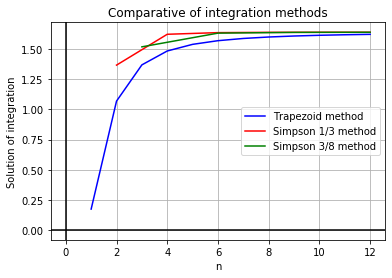

In [6]:
limit = 12

Trapeze_aproximation = []
Simpson_1_3aproximation = []
x_for_Simpson_1_3 = []
Simpson_3_8aproximation = []
x_for_Simpson_3_8 = []
for n in range(1, limit + 1):
    Trapeze_aproximation.append(multiple_aplication_trapeze(a, b, function, n))
    # Only even
    if(n%2 == 0):
        Simpson_1_3aproximation.append(multiple_aplication_Simpson_1_3(a, b, function, n))
        x_for_Simpson_1_3.append(n)
    # Three multiple
    if(n%3 == 0):
        Simpson_3_8aproximation.append(multiple_aplication_Simpson_3_8(a, b, function, n))
        x_for_Simpson_3_8.append(n)
    
plt.plot(np.arange(1, limit + 1), Trapeze_aproximation, color = 'b', label = 'Trapezoid method')
plt.plot(x_for_Simpson_1_3, Simpson_1_3aproximation, color = 'r', label = 'Simpson 1/3 method')
plt.plot(x_for_Simpson_3_8, Simpson_3_8aproximation, color = 'g', label = 'Simpson 3/8 method')
plt.legend()
plt.title('Comparative of integration methods')
plt.ylabel('Solution of integration')
plt.xlabel('n')
plt.axhline(color = 'k')
plt.axvline(color = 'k')
plt.grid()
plt.show()